In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sb
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cv2

In [2]:
#load the dataset
data = pd.read_csv("./Handwritten_Data.csv").astype('float32')

#show its head
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#rename the class column
data.rename(columns={'0':'label'}, inplace=True)
#show the top 5 rows 
data.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Image shape :(372450, 784)
Label shape :(372450,)


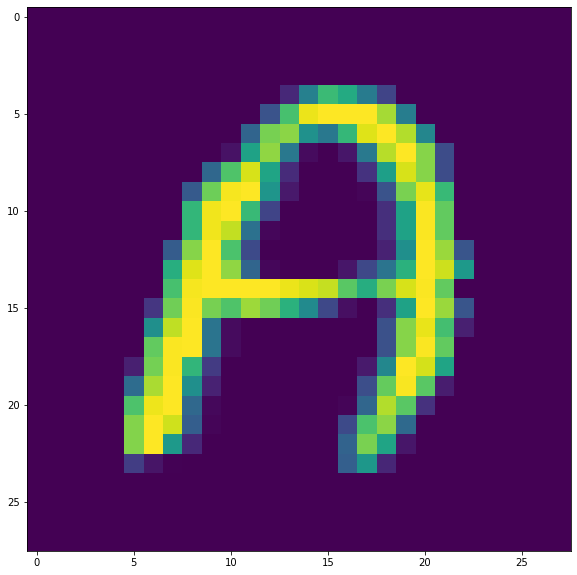

In [4]:
# split data to actual data and label.
x = data.drop('label',axis = 1)
y = data.label

#get the shape of labels and features 
print(f'Image shape :{x.shape}')
print(f'Label shape :{y.shape}')

#reshape and show one of the data as an image.
plt.figure(figsize = (12,10))
plt.imshow(x.iloc[1].values.reshape(28,28))
plt.show()

In [5]:
#split the data into train and test set 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((297960, 784), (74490, 784), (297960,), (74490,))

In [6]:
# scale data using minmax scaler.
scaler = MinMaxScaler()
scaler.fit(train_x)

train_x= scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [7]:
#reshape the data.
train_x_reshaped = np.reshape(train_x, (train_x.shape[0], 28,28, 1)).astype('float32')
test_x_reshaped = np.reshape(test_x, (test_x.shape[0], 28,28, 1)).astype('float32')
print("Train data: ", train_x_reshaped.shape)
print("Test data: ", test_x_reshaped.shape)

Train data:  (297960, 28, 28, 1)
Test data:  (74490, 28, 28, 1)


In [8]:
#convert labels to categorical
train_y = to_categorical(train_y,num_classes=26,dtype=int)
test_y = to_categorical(test_y,num_classes=26,dtype=int)
train_y.shape,test_y.shape

((297960, 26), (74490, 26))

In [9]:
#define a dictionary that maps the label to the alphabet.
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

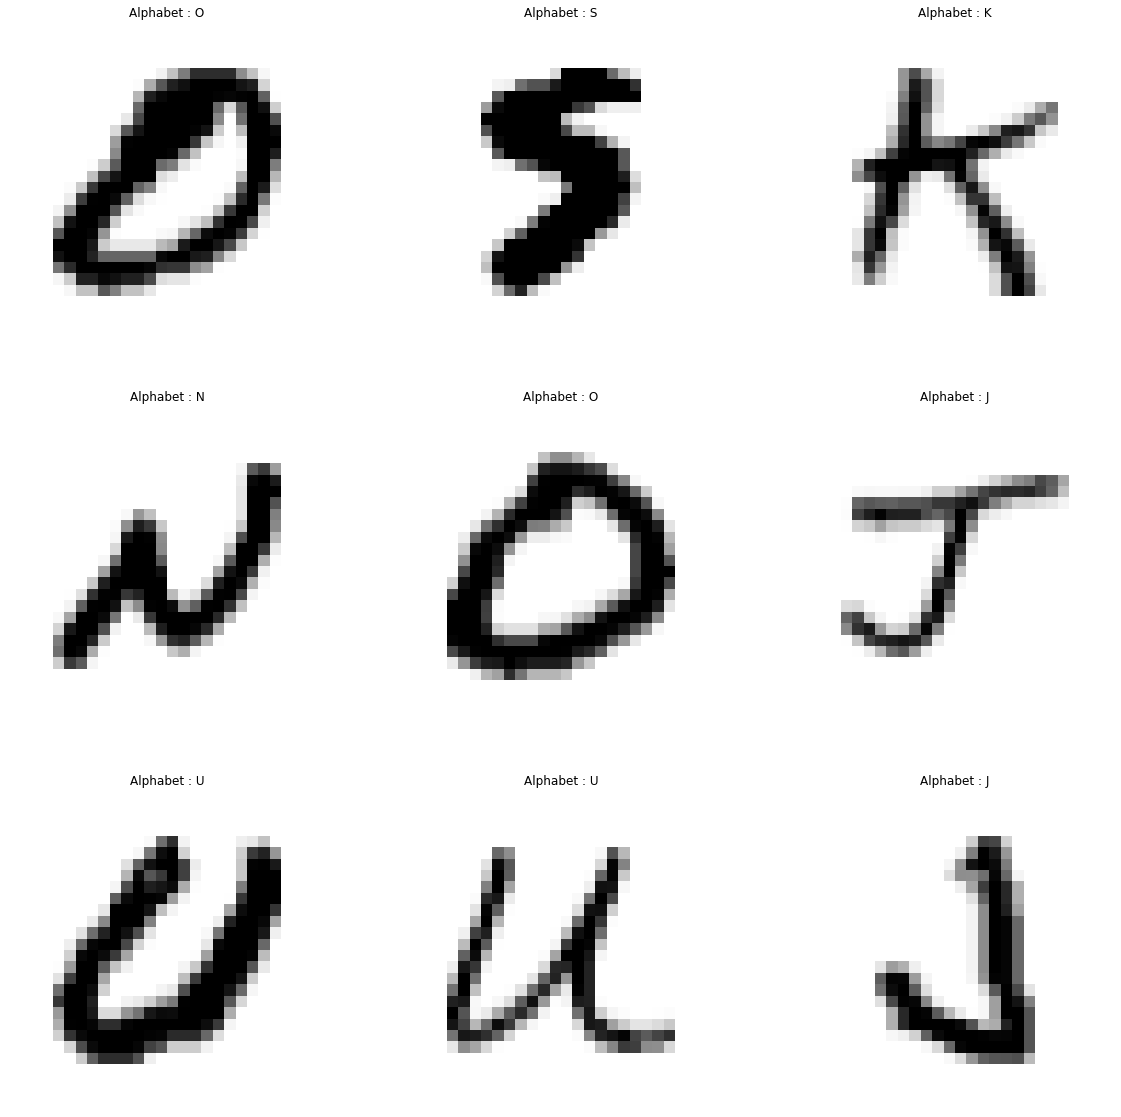

In [10]:
#show the image matching with the alphabet.
fig, axis = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(train_x_reshaped[i].reshape(28,28), cmap="Greys")
    ax.axis('off')
    ax.set(title = f"Alphabet : {letters_dict[train_y[i].argmax()]}")

In [11]:
#build the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

#flatten into a vector of single dimension
model.add(Flatten())

#given as an input to the dense layer (fully connected network)
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

#output layer 
model.add(Dense(26,activation ="softmax"))

#compile 
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [12]:
history = model.fit(train_x_reshaped, train_y, epochs=1,  validation_data = (test_x_reshaped,test_y))

9312/9312 [==============================] - 171s 18ms/step - loss: 0.3011 - accuracy: 0.9135 - val_loss: 0.0724 - val_accuracy: 0.9806


In [13]:
#save the model.
model.save(r'handwriting_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [15]:
#make prediction of the alphabet of test data.
preds = model.predict(test_x_reshaped)

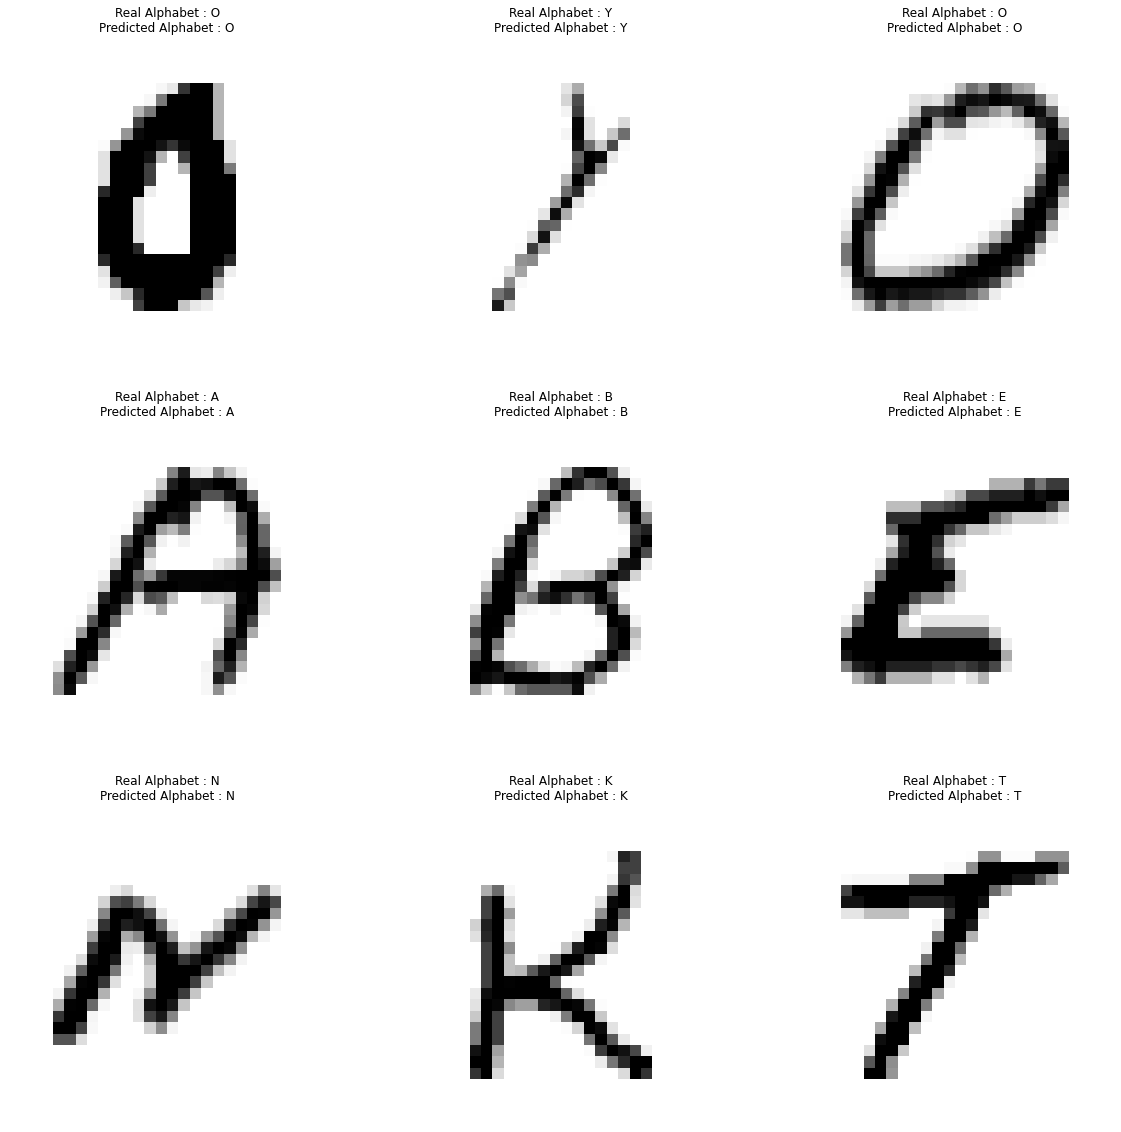

In [18]:
test_x_ = test_x.reshape(test_x.shape[0], 28, 28)
fig, axis = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x_[i], cmap="Greys")
    ax.axis('off')
    ax.set(title = f"Real Alphabet : {letters_dict[test_y[i].argmax()]}\nPredicted Alphabet : {letters_dict[preds[i].argmax()]}");

In [21]:
import time 

start=time.time()
history = model.fit(train_x_reshaped, train_y, epochs=10,batch_size=128,verbose=2,validation_data = (test_x_reshaped, test_y))
end=time.time()
print('\n')
print(f'Execution Time :{round((end-start)/60,3)} minutes')

Epoch 1/10
2328/2328 - 103s - loss: 0.0313 - accuracy: 0.9909 - val_loss: 0.0401 - val_accuracy: 0.9897
Epoch 2/10
2328/2328 - 111s - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 3/10
2328/2328 - 108s - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0345 - val_accuracy: 0.9917
Epoch 4/10
2328/2328 - 110s - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0313 - val_accuracy: 0.9919
Epoch 5/10
2328/2328 - 106s - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0345 - val_accuracy: 0.9924
Epoch 6/10
2328/2328 - 107s - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0334 - val_accuracy: 0.9924
Epoch 7/10
2328/2328 - 105s - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0338 - val_accuracy: 0.9926
Epoch 8/10
2328/2328 - 106s - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0322 - val_accuracy: 0.9932
Epoch 9/10
2328/2328 - 108s - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0340 - val_accuracy: 0.9932
Epoch 10/10
2328/2328 - 111s - loss: 0.0090 - accuracy: 0.9970 -

Text(0.5, 0, 'epochs')

<Figure size 432x288 with 0 Axes>

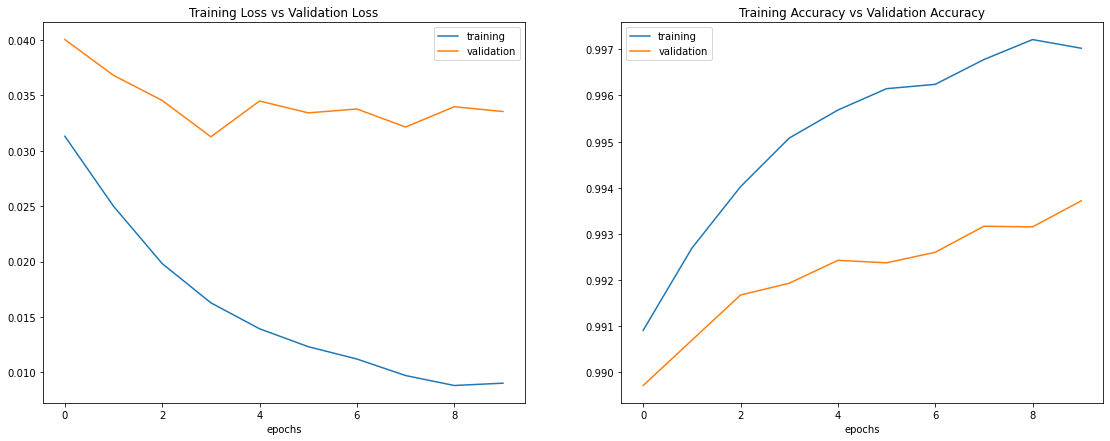

In [25]:
# Plot training loss vs validation loss 
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('Training Loss vs Validation Loss')
ax1.set_xlabel('epochs')

## plot training accuracy vs validation accuracy 
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Training Accuracy vs Validation Accuracy')
ax2.set_xlabel('epochs')